# Practice Numba cuda 3





Some of the problems below need some example input data. For that purpose, we  construct a numpy array `v` containing the sequence of digits in $\pi$ multiplied by $0.1$.

In [51]:
import numpy as np
pi_string = "3141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405132000568127145263560827785771342757789609"
pi_digits = [int(char) for char in pi_string]
v = 0.1*np.array(digits)[0:374]

__1a)__ Using numba, write a parallel implementation of a function that computes the element-wise product of 2 input arrays based on the declaration line and doc string below:

In [ ]:
def ewprod(u,v,w):
```
Compute the element-wise product of arrays

Args:
    u,v: 1D numpy arrays

Returns:
    w: 1D numpy array containing product of corresponding entries in input arrays u and v
```
    #insert code
    return w

Your implementation should include both the wrapper function `ewprod()` and the kernel function it calls to execute the operation in parallel.

__1b)__ Use your parallel code to compute the elementwise product of `v` with `1.-v` and compare with the results from numpy's built-in `*` or `multiply()`.

__1c)__ Now for the fun part. Modify your kernel to include a statement to make any thread whose index is a multiple of 32 (`if cuda.thradIdx.x % 32 == 0`) print the block and thread index values. Set your execution parameters to create a grid with 4 blocks of 96 threads. Execute the code several times and provide terminal output illustrating you answers to the following questions:

Is the order of block execution repeatable/predictable?

Do threads with lower thread index always execute before threads in the same block with higher thread index values? (In other words, is order of execution within a block repeatable/predictable?)



__2a)__ Write a python function `smooth(v,rad)` that smooths an array of data by computing a local average; i.e. in the output each element of the input array `v[i]` that has `rad` neighbors is replaced by the average of `2*rad+1` elements (`v[i-rad],...,v[i+rad])`. Let's construct a larger input array for this problem: `w = np.outer(v,1-v).flatten()` that has $375^2$ entries.

Use your `smooth()` function to compute smoothed versions of `w`. Plot the smoothed arrays for `rad=2` and `rad=4`. Compute the python timings for each computation and include them in the legend for your plot.

__2b)__ Write numba code to create a parallelized version of `smooth()`. Verify that it reproduces your results from 2a) and make a corresponding plot (this time including timings based on cuda events).

__2c)__ Write numba code to create a "tiled" parallelization of `smooth()` that uses shared memory. Again verify that your code reproduces your results from 2a) and make a corresponding plot (including timings based on cuda events.

__3)__ Our introductory discussion of ODEs dealt with initial value problems (IVPs), but boundary value problems (BVPs), where both initial and final conditions need to be satisfied, are also relevant. An important aplication involves computation of eigenvalues and eigenfunctions. For example, consider the longitudinal vibrations of a rod fixed at one end ($x=0$) and attached to a spring with stiffness $k$ at the other end ($x=L$). The governing equations are:


$$\rho A \frac{\partial^2 u}{\partial t^2} + A E \frac{\partial^2 u}{\partial x^2}  = 0, u(0,t) = 0, \big[A E \frac{\partial u}{\partial x} - k u \big]_{x=L} = 0$$

Applying separation of variables to this problem leads to a solution in terms of normal modes:
$$u_n(x,t) =  y_n(x) sin(\omega_n t + \phi)$$

with natural frequencies (eigenvalues) and mode shapes (eigenfunctions) satisfying the following an ODE and BCs that can be written in non-dimensional form as:
$$y_n'' + \omega_n^2 y = 0, \, y(0)=0, \, y'(\pi) - c y(\pi) = 0$$

The ODE is linear, so there is an arbitrary scaling constant and we can choose the initial velocity to be 1. However, the value of the constant  $\omega$ that causes the final condition to be satisfied is not known a priori. In the serial world, a loop implementing a subdivision scheme can be used to converge to the eigenvalues. With parallel capabilities, we can launch a grid that concurrently computes numerical solutions for thousands or millions of $\omega$ values, and then use the results of those numerical solutions to identify the eigenvalues. This question leads you through implementing such an approach:

__3a)__ Write python code to implement the $4^{th}$-order Runge Kutta ODE solver, and use it to compute the numerical solution of 
$$y'' + y = 0, \, y(0) = 0, y'(0) = 1$$
(Remember to convert to a $1^{st}$-order system.)

What is the global error at $x=\pi$ if the number of steps in the solution is 10? 100?

__3b) YOU CAN USE THE FORWARD EULER METHOD AS YOUR SOLVER FOR THIS PART.__
<br>Launch a 1D computational grid to compute solutions for
$$y'' + \omega^2 y = 0, \, y(0) = 0, y'(0) = 1$$
for values of $\omega \in [0,10]$ and return an array of values for $y'(\pi) - c y(\pi)$ with $c=1$. Based on finding sign changes in the array of results, determine the eigenvalues in the interval of interest. 

__3c)__ Use a `for()` loop and your code from 2b) to produce a plot of eigenvalues as a function of $c$ for $c \in [0,5]$. Briefly describe/discuss the results shown in your plot. Do your results coincide with known analytic results in the limits of very small and very large values of $c$?

__OPTIONAL: 3d)__ Write numba code that produces results equivalent to those obtained in 3c) but uses a fully parallel approach with a 2D computational grid instead of looping over $c$ values.

__4)__ Write a python implementation of a Jacobi iteration solver for the 2D Poisson equation that provides a model for numerous engineering properties  including the steady-state heat distribution in a plate. Assume that your system has a single source that imposes $u(0,0) = 1$ and $u(x,y) = 0.5$ for $x>0$ and $u(x,y) = -1$ for $x<0$ in the exterior region, which is described implicitly by $f(x,y) > 0$.

a) Compute the solution for a region with the following defining function $ f_0(x,y) = x^4 + y^4 -1$, and provide a 3D surface plot illustrating your results.

b) Determine the execution time for 100 iterations on a $128 \times 128$ grid.



__5)__ Parallelize your solution to Problem 4. 

a) Verify that your parallel implementation reproduces your serial results.

b) Determine the execution time for 100 iterations on a $128 \times 128$ grid, and compute the acceleration factor due to parallelization.


[0.21 0.09 0.24 0.09 0.25 0.09 0.16 0.24 0.25 0.21 0.25 0.16 0.09 0.21
 0.09 0.21 0.16 0.21 0.16 0.24 0.24 0.16 0.24 0.24 0.21 0.21 0.16 0.21
 0.16 0.21 0.09 0.25 0.   0.16 0.16 0.16 0.24 0.09 0.09 0.21 0.09 0.24
 0.09 0.21 0.09 0.09 0.21 0.21 0.25 0.09 0.   0.25 0.16 0.16 0.   0.09
 0.21 0.24 0.09 0.24 0.24 0.25 0.09 0.16 0.21 0.   0.21 0.16 0.09 0.24
 0.24 0.   0.24 0.16 0.16 0.24 0.16 0.   0.16 0.09 0.09 0.16 0.24 0.16
 0.16 0.   0.21 0.24 0.16 0.16 0.25 0.21 0.24 0.16 0.09 0.09 0.21 0.
 0.24 0.21 0.09 0.16 0.16 0.09 0.24 0.16 0.   0.16 0.24 0.25 0.09 0.21
 0.16 0.16 0.16 0.21 0.   0.24 0.24 0.24 0.21 0.   0.09 0.21 0.16 0.24
 0.24 0.24 0.   0.09 0.25 0.25 0.   0.25 0.16 0.16 0.16 0.21 0.09 0.21
 0.16 0.25 0.21 0.25 0.09 0.24 0.   0.16 0.09 0.16 0.16 0.24 0.16 0.09
 0.09 0.09 0.21 0.24 0.25 0.   0.16 0.16 0.24 0.09 0.   0.16 0.21 0.
 0.09 0.09 0.21 0.16 0.25 0.16 0.09 0.09 0.   0.25 0.25 0.25 0.09 0.24
 0.24 0.24 0.24 0.16 0.16 0.09 0.24 0.16 0.09 0.25 0.24 0.09 0.21 0.
 0.21 0.16 0

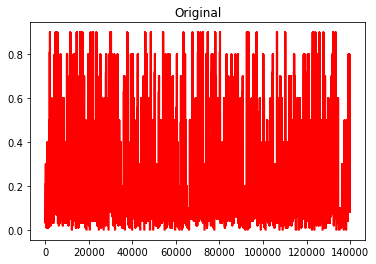

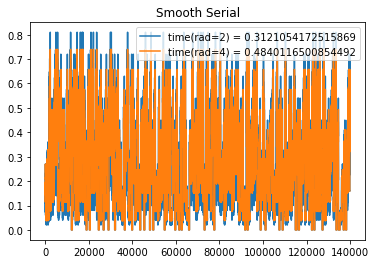

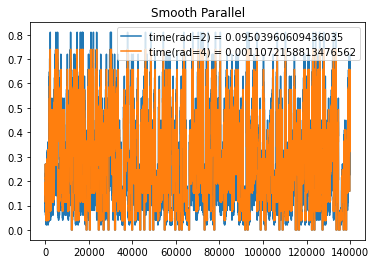

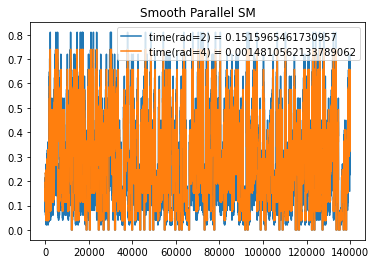

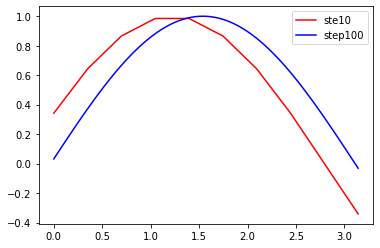

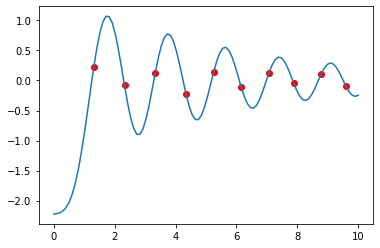

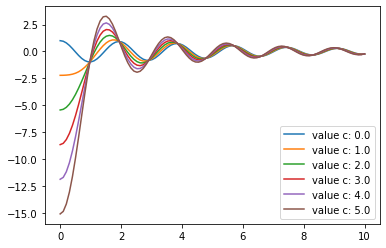

Execution time take for p4 b):7.905456304550171s


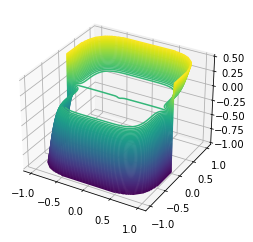

Execution time take for p5):0.28586840629577637s


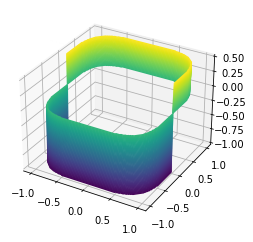

In [1]:
import numpy as np
from numba import cuda, float32, float64
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
##Import other packages here##

pi_string = "3141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405132000568127145263560827785771342757789609"
pi_digits = [int(char) for char in pi_string]
v = 0.1*np.array(pi_digits)[0:374]


def ewprod(u,v):
    '''
    Compute the element-wise product of arrays
    Must call GPU kernel function
    Args:
        u,v: 1D numpy arrays

    Returns:
        w: 1D numpy array containing product of corresponding entries in input arrays u and v
    '''
    TPB = 96
    n = u.size
    d_u = cuda.to_device(u)
    d_v = cuda.to_device(v)
    d_w = cuda.device_array(n, dtype = np.float64)
    blockdims = TPB
    gridDims = (n+TPB-1)//TPB
#     logistic_map_kernel[gridDims, blockdims](d_ss, d_r, x, transient, steady)
    ewprod_kernel[gridDims, blockdims](d_u, d_v, d_w)
    
    #copy device to host
    return d_w.copy_to_host()



# Using numba, write a parallel implementation of a function that computes the element-wise product of 2 input arrays based on the declaration line and doc string below:
#parallel
@cuda.jit 
def ewprod_kernel(u,v,w): 
    # insert code
    i = cuda.grid(1)
    n = u.size
    if i < n:
        w[i] = u[i] * v[i]
        # part c): 
        index = cuda.threadIdx.x
        if index % 32 == 0:
            print("thread index: ", index % 96)
        
def smooth_serial(v,rad):
    '''
    compute array of local averages (with radius rad)
    '''
    n = v.size  
    w = np.zeros(n)
    for i in range(n):
        if i > n-rad-1 or i < rad: w[i] = v[i]

        else:
            for k in range(i-rad, i+rad+1): w[i] += v[k]
            w[i] = w[i] / (2*rad+1)
    return w

@cuda.jit
def smooth_kernel(d_v, d_out, rad):
    n = d_v.size
    i = cuda.grid(1)
    if i > n-rad or i < rad : 
        d_out[i] = d_v[i]
    else:
        d_out[i] = 0
        for j in range(i-rad, i+rad+1):
            d_out[i] += d_v[j]
        d_out[i] = d_out[i] / (2*rad+1)


def smooth_parallel(v,rad):
    '''
    compute array of local averages (with radius rad)
    Must call GPU kernel function
    '''
    n = v.size
    d_v = cuda.to_device(v)
    d_out = cuda.device_array(n, dtype=np.float32)
    TPB = 96
    gridDim = (n+TPB-1) // TPB
    blockDim = TPB
    smooth_kernel[gridDim, blockDim](d_v, d_out, rad)
    return d_out.copy_to_host()


# Use your smooth() function to compute smoothed versions of w. Plot the smoothed arrays for rad=2 and rad=4. Compute the python timings for each computation and include them in the legend for your plot.
@cuda.jit
def smooth_parallel_sm_kernel(d_w, d_out, rad):
    n = d_w.size
    i = cuda.grid(1)
    if rad == 2:
        sh_w = cuda.shared.array(36, dtype=float32)
    elif rad == 4:
        sh_w = cuda.shared.array(40, dtype=float32)
    thr_Idx = cuda.threadIdx.x
    sh_Idx = thr_Idx + rad
    if i >= n:
        return

    sh_w[sh_Idx] = d_w[i]
    if thr_Idx < rad:
        if i >= rad:
            sh_w[sh_Idx - rad] = d_w[i-rad]
        if i + cuda.blockDim.x < n:
            sh_w[sh_Idx + cuda.blockDim.x] = d_w[i+ cuda.blockDim.x]
    cuda.syncthreads()

    temp = 0
    for d in range(thr_Idx, thr_Idx + 2*rad+1):
        temp += sh_w[d]
    d_out[i] = temp / (2*rad+1)


def smooth_parallel_sm(v, rad):
    '''
    compute array of local averages (with radius rad)
    Must call GPU kernel function & utilize shared memory
    '''
    n = v.size
    d_w = cuda.to_device(v)
    d_out = cuda.device_array(n, dtype=np.float32)
    TPB = 32
    gridDim = (n+TPB-1) // TPB
    blockDim = TPB
    smooth_parallel_sm_kernel[gridDim, blockDim](d_w, d_out, rad)
    return d_out.copy_to_host()

def f3eq(t, y):
    return np.array([y[1], -y[0]])


def rk4_step(f, y, t0, h):
    """
    compute next value for 4th order Runge Kutta ODE solver

    Args:
        f: right-hand side function that gives rate of change of y
        y: float value of dependent variable
        t0: float initial value of independent variable
        h: float time step

    Returns:
        y_new: float estimated value of y(t0+h)
    """
    k1 = f(t0, y)
    k2 = f(t0 + h/2.0, y + k1*h/2.0)
    k3 = f(t0 + h/2.0, y + k2*h/2.0)
    k4 = f(t0 + h, y + h * k3)
    y_new = y + 1/6*(k1+2*k2+2*k3+k4)*h
    return y_new


def rk_solve(f, y0, t):
    """
    Runge-Kutta solver for systems of 1st order ODEs
    (should call function rk4_step)

    Args:
        f: name of right-hand side function that gives rate of change of y
        y0: numpy array of initial float values of dependent variable
        t: numpy array of float values of independent variable
        h: float stepsize

    Returns:
        y: 2D numpy array of float values of dependent variable
    """
    y = y0
    yy = np.array([t, t], dtype=np.float32)
    h = t[1] - t[0]
    for i in range(t.size):
        y = rk4_step(f, y, t[i], h)
        yy[0][i] = y[0]
        yy[1][i] = y[1]
    return yy

@cuda.jit
def rk4_step_parallel(y, t0, h, w):
    """
    compute next value for 4th order Runge Kutta ODE solver

    Args:
        f: right-hand side function that gives rate of change of y
        y: float value of dependent variable
        t0: float initial value of independent variable
        h: float time step
        w: float of omega value
    """
    def f4eq(y, w):
        yy = - y * w**2
        return yy

    i = cuda.grid(1)
    n = w.size
    if i < n:
        k = w[i]
        f_2_0 = y[i][1] + h * f4eq(y[i][0], k) / 2
        f_2_1 = f4eq(y[i][0] + h * y[i][1] / 2, k)
        f_3_0 = y[i][1] + h * f_2_1 / 2
        f_3_1 = f4eq(y[i][0] + h * f_2_0 / 2, k)
        f_4_0 = y[i][1] + h * f4eq(y[i][0], k)
        f_4_1 = f4eq(y[i][0] + h * y[i][1], k)
        y[i][0] += h / 6 * (y[i][1] + 2 * f_2_0 + 2 * f_3_0 + f_4_0)
        y[i][1] += h / 6 * (f4eq(y[i][0], k) + 2 * f_2_1 + 2 * f_3_1 + f_4_1)

# @cuda.jit
def rk4_solve_parallel(y, t, w):
    """
    Runge-Kutta solver for systems of 1st order ODEs
    (should call function rk4_step_parallel)

    Args:
        f: name of right-hand side function that gives rate of change of y
        y: numpy array of dependent variable output (fist entry should be initial conditions)
        t: numpy array of float values of independent variable
        w: numpy array of omega values
    """
    n = w.size - 1
    d_w = cuda.to_device(w)    
    d_y = cuda.to_device(y)
    d_t = cuda.to_device(t)
    TPBX = 32
    gridDim = (n+TPBX-1) // TPBX
    blockDim = TPBX

    h = t[1] - t[0]
    for j in range(t.size):
        rk4_step_parallel[gridDim, blockDim](d_y, d_t[j], h, d_w)
    return d_y.copy_to_host()


def func_p4(x,y):
    return np.power(x, 4) + np.power(y, 4) - 1

def jacobi_update_serial(x, y, u, f):
    """
    Performs jacobi iteration update for 2D Poisson equation
    Boundary conditions: u(0,0)=1; outside boundary defined by f, u(x<0)=-1, u(x>0)=0.5

    Args:
        x: vector specifying x coordinates
        y: vector specifying y coordinates
        u: 2D input array for update (u.shape = (len(x),len(y)))
        f: function specifying boundary of region to evaluation Poission equation

    Precondtion:
        The cordinate system defined by vectors x and y contains the point (0,0) and spans
        the entire boundary defined by f

    Returns:
        v: updated version of u
    """
    v = np.copy(u)
#     u.shape = (len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            if f(x[i], y[j])<=0: v[i,j] = 1/4*(u[i-1,j]+u[i+1,j]+u[i,j-1]+u[i,j+1])
            else:
            #imposes $u(0,0) = 1$ and $u(x,y) = 0.5$ for $x&gt;0$ and $u(x,y) = -1$ for $x&lt;0$ in the exterior region
                if x[i]==0 and y[j]==0: u[i,j] = 1
                elif x[i]>0: v[i,j] = 0.5
                elif x[i] < 0: v[i,j] = -1
    return v



@cuda.jit(device=True)
def function_5(x,y):
    return np.power(x, 4) + np.power(y, 4) - 1

@cuda.jit
def jacobi_update_kernel(u_in, u_out, x, y):
    """
    Performs jacobi iteration update for 2D Poisson equation
    Boundary conditions: u(0,0)=1; outside boundary defined by f, u(x<0)=-1, u(x>0)=0.5
    where f = x^4 + y^4 - 1

    Args:
        d_x: vector specifying x coordinates
        d_y: vector specifying y coordinates
        d_u: 2D input array for update (u.shape = (len(x),len(y)))

    Precondtion:
        The cordinate system defined by vectors x and y contains the point (0,0) and spans
        the entire boundary defined by f
    """
    def f(x, y):
        return x**4 + y**4 - 1

    i, j = cuda.grid(2)
    # u.shape = (len(x),len(y))

    if i < x.shape[0] and j < y.shape[0]:
        if f(x[i], y[j]) <= 0:
            u_out[i, j] = 1 / 4 * (u_in[i - 1, j] + u_in[i + 1, j] + u_in[i, j - 1] + u_in[i, j + 1])
        else:
        #imposes $u(0,0) = 1$ and $u(x,y) = 0.5$ for $x&gt;0$ and $u(x,y) = -1$ for $x&lt;0$ in the exterior region
            if x[i] == 0 and y[j] == 0: u_out[i, j] = 1
            elif x[i] > 0: u_out[i, j] = 0.5
            elif x[i] < 0: u_out[i, j] = -1

            

def jacobi_update_parallel(x, y, u):
    """
    Performs jacobi iteration update for 2D Poisson equation
    Boundary conditions: u(0,0)=1; outside boundary defined by f, u(x<0)=-1, u(x>0)=0.5
    
    Args:
        x: vector specifying x coordinates
        y: vector specifying y coordinates
        u: 2D input array for update (u.shape = (len(x),len(y)))
        f: function specifying boundary of region to evaluation Poission equation

    Precondtion:
        The cordinate system defined by vectors x and y contains the point (0,0) and spans 
        the entire boundary defined by f
        
    Returns:
        v: updated version of u
    """

    TPBY = 16
    TPBX =16
    u = np.zeros([len(x), len(y)], dtype=np.float32)
    d_x = cuda.to_device(x)
    d_y = cuda.to_device(y)
    u = cuda.to_device(u)
    v = cuda.device_array([len(x), len(y)], dtype=np.float32)
    gridDims = ((len(x) + TPBX-1) // TPBX, (len(y) + TPBY - 1) // TPBY)
    blockDims = (TPBX, TPBY)
    jacobi_update_kernel[gridDims, blockDims](u, v, d_x, d_y)

    return v.copy_to_host()




if __name__ == "__main__":

    #Problem 1  
#     1b) Use your parallel code to compute the elementwise product of v with 1.-v and compare with the results from numpy's built-in * or multiply().
    u = 1. - v
    ewprod_arr = np.array(ewprod(u,v)) #parallel
    print(ewprod_arr)#parallel
    ewprod_mul = np.multiply(u,v)
    print(ewprod_mul)
    print('Compare', np.array_equal(ewprod_arr, ewprod_mul))
    
    
#    1c) 
    print('Is the order of block execution repeatable/predictable?  no')
    print('Do threads with lower thread index always execute before threads in the same block with higher thread index values? (In other words, is order of execution within a block repeatable/predictable?  no')
 

# Problem 2
#     a) smooth_serial
    w = np.outer(v, 1-v).flatten()
    
    plt.plot(w, 'r')
    plt.title('Original')
    plt.show()
    rad_2 = 2
    rad_4 = 4
    t0_2 = time.time()
    out_2 = smooth_serial(w, rad_2)
    t_2 = time.time()-t0_2

    t0_4 = time.time()
    out_4 = smooth_serial(w, rad_4)
    t_4 = time.time()-t0_4
    
    plt.figure()
    plt.plot(out_2, label = 'time(rad=2) = {}'.format(t_2))
    plt.plot(out_4, label = 'time(rad=4) = {}'.format(t_4))
    plt.legend()
    plt.title('Smooth Serial')    
    plt.show()    
    
        
#     b) smooth_parallel
    t0_2 = time.time()
    out_2 = smooth_parallel(w, rad_2)
    t_2 = time.time()-t0_2

    t0_4 = time.time()
    out_4 = smooth_parallel(w, rad_4)
    t_4 = time.time()-t0_4
    
    plt.figure()
    plt.plot(out_2, label = 'time(rad=2) = {}'.format(t_2))
    plt.plot(out_4, label = 'time(rad=4) = {}'.format(t_4))
    plt.legend()
    plt.title('Smooth Parallel')    
    plt.show()    
    
    
#     c) smooth_parallel_sm
    t0_2 = time.time()
    out_2 = smooth_parallel_sm(w, rad_2)
    t_2 = time.time()-t0_2

    t0_4 = time.time()
    out_4 = smooth_parallel_sm(w, rad_4)
    t_4 = time.time()-t0_4
    
    plt.figure()
    plt.plot(out_2, label = 'time(rad=2) = {}'.format(t_2))
    plt.plot(out_4, label = 'time(rad=4) = {}'.format(t_4))
    plt.legend()
    plt.title('Smooth Parallel SM')    
    plt.show()        


    
# Problem 3

# 10
    step_10 = 10
    y0 = np.array([0,1])
    t_10 = np.linspace(0, np.pi, step_10)
    y_10 = rk_solve(f3eq, y0, t_10)

# 100
    step_100 = 100
    t_100 = np.linspace(0, np.pi, step_100)
    y_100 = rk_solve(f3eq, y0, t_100)
    
    plt.figure()
    plt.plot(t_10, y_10[0], 'r', label = 'ste10')
    plt.plot(t_100, y_100[0], 'b', label ='step100')
    # plt.title("p3 a)")
    plt.legend()
    plt.show()


#   b )

    yy = np.zeros([100, 2])
    # y = np.array([0,1])
    tt = np.linspace(0, np.pi, 40)
    # w = np.array([0 10])
    ww = np.linspace(0, 10, 100)
    yc = np.zeros(100)
# determine the eigenvalues in the interval of interest.
    for i in range(100): yy[i][1] = 1
    dy = rk4_solve_parallel(yy, tt, ww)
    new_yc = dy[0][1]-dy[0][0]
    for i in range(100):
        old_yc = new_yc
        new_yc = dy[i][1] - dy[i][0]
        yc[i]= new_yc
        if (old_yc * new_yc <= 0): plt.plot(ww[i], new_yc, 'or')
    plt.plot(ww, yc)
    plt.show()

#   c)
    c = np.linspace(0, 5, 6)
    for i in range(6):
        yc = np.zeros(100)
        for j in range(100):
            new_yc = dy[j][1] - c[i]*dy[j][0]
            yc[j] = new_yc
        plt.plot(ww, yc, label='value c: ' + str(c[i]))
    plt.legend()
    plt.show()
    
    
#  Problem 4
#   128x128 grid
    nx = 128 
    ny = 128
    u = np.zeros([nx, ny])    
    x = np.linspace(-1, 1, nx)
    y = np.linspace(-1, 1, ny)
    # f = np.power(x, 4) + np.power(y, 4) - 1
    t0 = time.time()
    # b) Determine the execution time for 100 iterations on a $128 \times 128$ grid.
    for _ in range(100):
        u = jacobi_update_serial(x, y, u, func_p4)
    t = time.time()-t0
    print('Execution time take for p4 b):' + str(t) + 's')
    fig = plt.figure()
    axp = plt.axes(projection='3d')
    XX, YY = np.meshgrid(x, y)
    axp.contour3D(XX, YY, u, 100, cmap='viridis')
    plt.draw()
    plt.show()
    
    nx, ny = 128, 128
    x = np.linspace(-1, 1, nx)
    y = np.linspace(-1, 1, ny)
    u = np.zeros([nx, ny])



# Problem 5
    t0 = time.time()
    for _ in range(100):
        u = jacobi_update_parallel(x, y, u)
    t = time.time()-t0
    print('Execution time take for p5):' + str(t) + 's')    
    fig5 = plt.figure()
    axp = plt.axes(projection='3d')
    XX, YY = np.meshgrid(x, y)
    axp.contour3D(XX, YY, u, 100, cmap='viridis')
    plt.draw()